In [1]:
%matplotlib notebook

# load dependencies
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd
import scipy.stats as st

In [2]:
# read in files
home_value = pd.read_csv('Resources/median_house_value.csv')
property_crimes = pd.read_csv('Resources/property_crimes.csv')

# merge csv files
house_df = pd.merge(property_crimes, home_value, on='State', how='outer')

# check the file has been read in
house_df.head()

,State,Property Crime,Abbreviation,Average FICO Score,Median Home Value,Average Outstanding Mortgage Amount,Difference Between Value and Mortgage Balance,
0,California,921114,CA,708,550800,363891,186909,
1,Texas,693204,TX,680,199900,177924,21976,
2,Florida,460846,FL,694,237900,188223,49677,
3,New York,267155,NY,712,305300,237610,67690,
4,Georgia,252249,GA,682,193500,175086,18414,


In [3]:
# clean dataframe with only the relevant data
property_df = house_df[['State', 'Abbreviation', 'Median Home Value', 'Property Crime']]



# check dataframe for any errors
property_df.head()

,State,Abbreviation,Median Home Value,Property Crime
0,California,CA,550800,921114
1,Texas,TX,199900,693204
2,Florida,FL,237900,460846
3,New York,NY,305300,267155
4,Georgia,GA,193500,252249


<IPython.core.display.Javascript object>


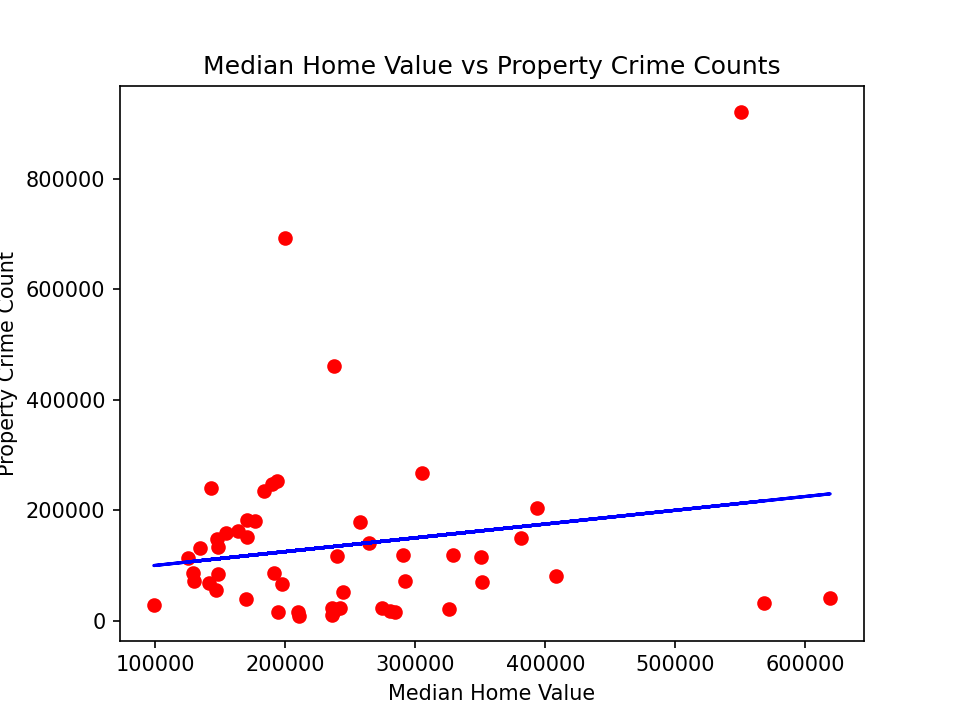

Text(0.5, 1.0, 'Median Home Value vs Property Crime Counts')

In [4]:
# create scatter plot for median home value and total murders

# create dataframe for just median home value and total murders
house_p = property_df[["State","Median Home Value", "Property Crime"]]
house_p  = house_p.set_index("State")

#bins = (0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000)

# show plot
house_p.plot(kind='scatter', x='Median Home Value', y='Property Crime', color='red')
plt.yticks()
plt.title('Median Home Value vs Property Crime Counts')




In [5]:
# plot lineregress
x_values = property_df['Median Home Value']
y_values = property_df['Property Crime']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='red')
plt.plot(x_values,regress_values,"b-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Home Value')
plt.ylabel('Property Crime Count')
plt.title('Median Home Value vs Property Crime Counts')

# print r-valaue and show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save fig as output
plt.savefig('Image Output/house_value_property_crime')

The r-squared is: 0.02965254331952269


In [6]:
# create variables for plots

house_value = property_df['Median Home Value']
crime_count = property_df['Property Crime']
corr = st.pearsonr(house_value,crime_count)

In [7]:
print(f"The correlation coefficient between median home value and total murders is {round( (corr[0]),2)}")

The correlation coefficient between median home value and total murders is 0.17


In [8]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations

hm_corr = property_df.corr()
hm_corr.unstack().sort_values()

Median Home Value  Property Crime       0.172199
Property Crime     Median Home Value    0.172199
Median Home Value  Median Home Value    1.000000
Property Crime     Property Crime       1.000000
dtype: float64

<IPython.core.display.Javascript object>


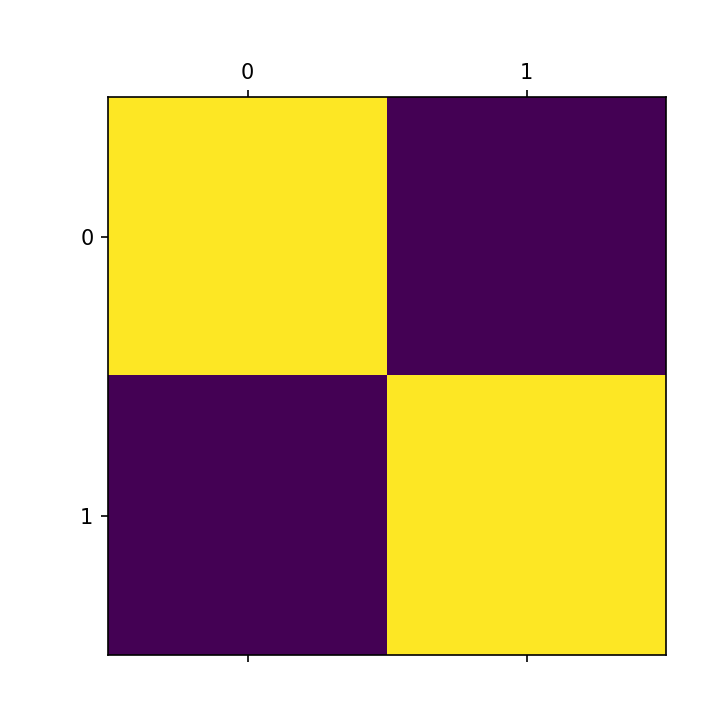

In [9]:
# correlation map for fun

plt.matshow(property_df.corr())
plt.show()